In [26]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [51]:
purchase_data =pd.read_csv("purchase data.csv")
purchase_data.head()


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
purchase_data.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [4]:
scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca=pickle.load(open('kmeans_pca.pickel','rb'))

In [5]:
features=purchase_data[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]

In [6]:
purchase_data_std = scaler.transform(features)

In [7]:
purchase_data_pca = pca.transform(purchase_data_std)

In [8]:
purchase_data_cluster_pca = kmeans_pca.predict(purchase_data_pca)

In [9]:
purchase_predictors=purchase_data.copy()
purchase_predictors['Segment']= purchase_data_cluster_pca

In [10]:
purchase_predictors

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,2
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,2
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,2
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,2


In [11]:
purchase_predictors['Segment'].value_counts()

Segment
2    21495
1    13580
0    12123
3    11495
Name: count, dtype: int64

In [12]:
purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [13]:
temp1 = purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).count()
temp1=temp1.set_index('ID')
temp1 = temp1.rename(columns={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [14]:
temp2 = purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).sum()
temp2=temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence':'N_Purchases'})
temp2.head()

,N_Purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [15]:
temp3=temp1.join(temp2)
temp3

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13
...,...,...
200000496,120,20
200000497,120,43
200000498,131,39


In [16]:
temp3['Average_N_purchases'] = temp3['N_Purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [17]:
temp4 = purchase_predictors[['ID','Segment']].groupby(['ID'],as_index=False).mean()
temp4=temp4.set_index('ID')
temp4

,Segment
ID,
200000001,2.0
200000002,3.0
200000003,2.0
200000004,2.0
200000005,1.0
...,...
200000496,0.0
200000497,2.0
200000498,0.0


In [18]:
purchase_data_description =temp3.join(temp4)
purchase_data_description.head()

,N_Visits,N_Purchases,Average_N_purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


Segment Proportion


In [24]:
segment_proportion = purchase_data_description[['N_Purchases','Segment']].groupby(['Segment']).count()/purchase_data_description.shape[0]
segment_proportion.rename(columns={'N_Purchases':'Segment Proportion'},inplace=True)
segment_proportion

,Segment Proportion
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


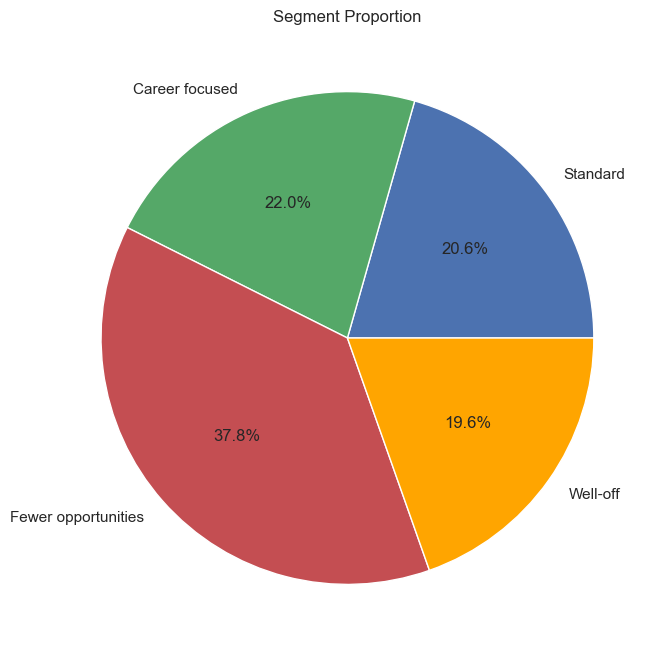

In [34]:
plt.figure(figsize=(10,8))
plt.pie(segment_proportion['Segment Proportion'],
        labels=['Standard', 'Career focused','Fewer opportunities','Well-off'],
        autopct='%1.1f%%',
        colors=('b','g','r','orange'))
plt.title('Segment Proportion')
plt.show()

In [31]:
purchase_data_description.head()

,N_Visits,N_Purchases,Average_N_purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


In [32]:
segment_data_mean = purchase_data_description.groupby(['Segment']).mean()
segment_data_mean

,N_Visits,N_Purchases,Average_N_purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [33]:
segment_data_std = purchase_data_description.groupby(['Segment']).std()
segment_data_std

,N_Visits,N_Purchases,Average_N_purchases
Segment,,,
0.0,19.039605,16.774464,0.126603
1.0,44.864656,53.744530,0.200056
2.0,16.410498,13.815040,0.120335
3.0,20.716152,25.900579,0.171787


Text(0.5, 1.0, 'Average Number of Store Visits By Segment')

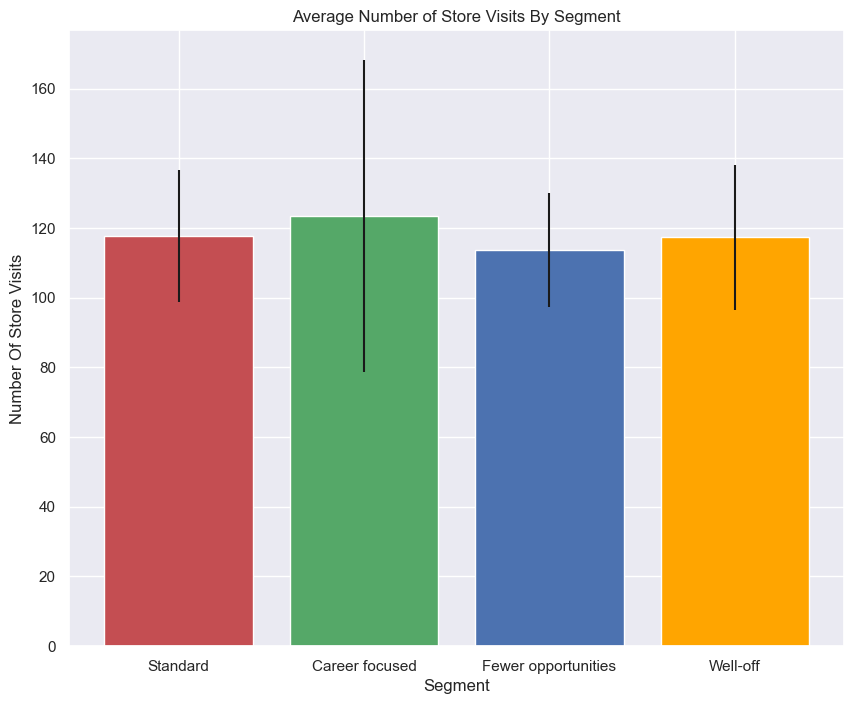

In [40]:
plt.figure(figsize=(10,8))
plt.bar(x=(0,1,2,3),
        tick_label=('Standard', 'Career focused','Fewer opportunities','Well-off'),
        height = segment_data_mean['N_Visits'],
        yerr = segment_data_std['N_Visits'],
        color=('r','g','b','orange')    
)
plt.xlabel('Segment')
plt.ylabel('Number Of Store Visits')
plt.title('Average Number of Store Visits By Segment')

Text(0.5, 1.0, 'Average Number of Purchases By Segment')

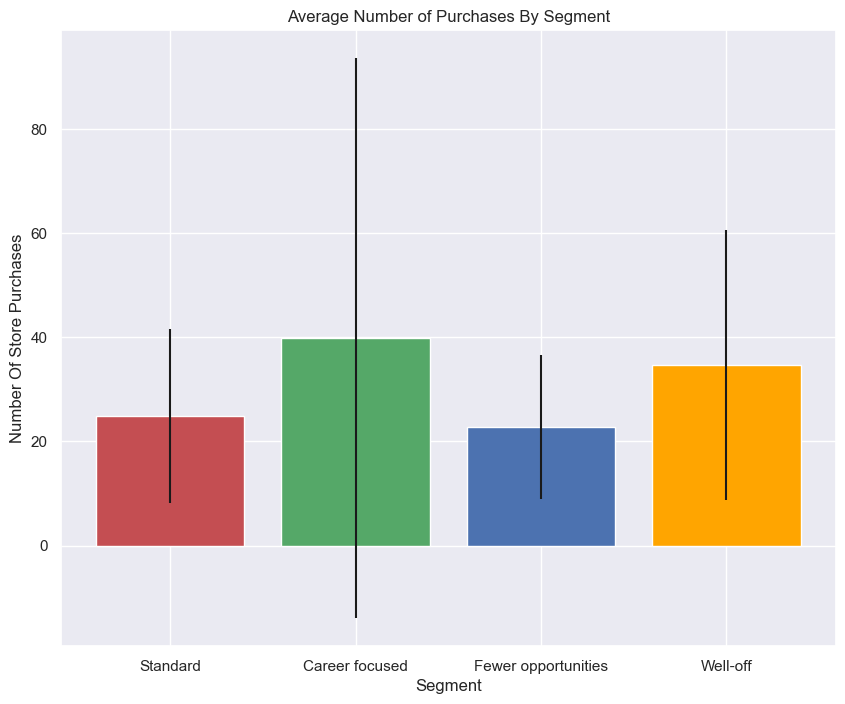

In [41]:
plt.figure(figsize=(10,8))
plt.bar(x=(0,1,2,3),
        tick_label=('Standard', 'Career focused','Fewer opportunities','Well-off'),
        height = segment_data_mean['N_Purchases'],
        yerr = segment_data_std['N_Purchases'],
        color=('r','g','b','orange')    
)
plt.xlabel('Segment')
plt.ylabel('Number Of Store Purchases')
plt.title('Average Number of Purchases By Segment')

Brand Choice

In [46]:
purchase_incidence = purchase_predictors[purchase_predictors['Incidence']==1]
purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,2
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,2
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,2
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,2


In [56]:
brand_dummies = pd.get_dummies(purchase_incidence['Brand'],prefix='Brand',prefix_sep='_')
brand_dummies['Segment'],brand_dummies['ID']=purchase_incidence['Segment'],purcahse_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,2,200000001
11,False,False,False,False,True,2,200000001
19,True,False,False,False,False,2,200000001
24,False,False,False,True,False,2,200000001
29,False,True,False,False,False,2,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,2,200000500
58648,True,False,False,False,False,2,200000500
58674,False,True,False,False,False,2,200000500
58687,False,True,False,False,False,2,200000500


In [57]:
brand_dummies.replace({True:1,False:0}, inplace=True)
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [58]:
temp = brand_dummies.groupby('ID',as_index=True).mean()
temp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,2.0
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,3.0
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,2.0
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,2.0
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,0.0
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,2.0
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,0.0


In [59]:
mean_brand_choice = temp.groupby('Segment',as_index=True).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.251186,0.396502,0.156481,0.059474,0.136357
1.0,0.072871,0.146808,0.039976,0.112395,0.627951
2.0,0.137567,0.681190,0.020923,0.061548,0.098772
3.0,0.041928,0.117422,0.030610,0.613623,0.196417


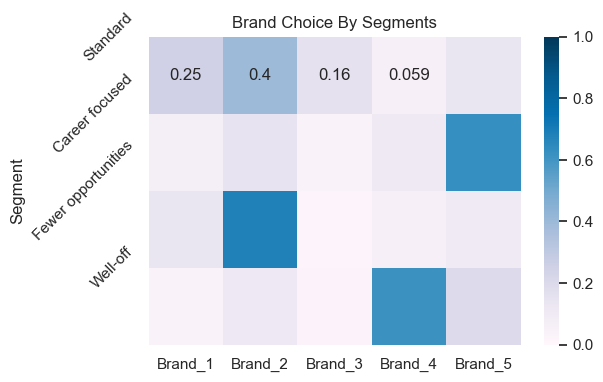

In [66]:
plt.figure(figsize=(6,4))
sns.heatmap(mean_brand_choice,
            vmin=0,
            vmax=1,
            cmap="PuBu",
            annot=True   
)
plt.yticks([0,1,2,3],['Standard', 'Career focused','Fewer opportunities','Well-off'],rotation=45)
plt.title('Brand Choice By Segments')
plt.show()

Revenue By Segments

In [67]:
purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,2
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,2
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,2
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,2


In [121]:
pd.options.mode.copy_on_write = True
temp = purchase_incidence[purcahse_incidence['Brand']==1]
temp.loc[:,'Revenue Brand 1']= temp['Quantity']*temp['Price_1']
segments_brand_revenue =pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']]=temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [122]:
temp = purchase_incidence[purcahse_incidence['Brand']==2]
temp.loc[:,'Revenue Brand 2']= temp['Quantity']*temp['Price_2']
segments_brand_revenue[['Segment','Revenue Brand 2']]=temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2
0,0,2611.19,4768.52
1,1,736.09,1746.42
2,2,2258.90,13955.14
3,3,699.47,1298.23


In [123]:
temp = purchase_incidence[purcahse_incidence['Brand']==3]
temp.loc[:,'Revenue Brand 3']= temp['Quantity']*temp['Price_3']
segments_brand_revenue[['Segment','Revenue Brand 3']]=temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,2611.19,4768.52,3909.17
1,1,736.09,1746.42,664.75
2,2,2258.90,13955.14,716.25
3,3,699.47,1298.23,731.35


In [124]:
temp = purchase_incidence[purcahse_incidence['Brand']==4]
temp.loc[:,'Revenue Brand 4']= temp['Quantity']*temp['Price_4']
segments_brand_revenue[['Segment','Revenue Brand 4']]=temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,2611.19,4768.52,3909.17,861.38
1,1,736.09,1746.42,664.75,2363.84
2,2,2258.90,13955.14,716.25,1629.31
3,3,699.47,1298.23,731.35,14185.57


In [125]:
temp = purchase_incidence[purcahse_incidence['Brand']==5]
temp.loc[:,'Revenue Brand 5']= temp['Quantity']*temp['Price_5']
segments_brand_revenue[['Segment','Revenue Brand 5']]=temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2611.19,4768.52,3909.17,861.38,2439.75
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [126]:
segments_brand_revenue['Total Revenue']=(segments_brand_revenue['Revenue Brand 1']+
                                           segments_brand_revenue['Revenue Brand 2']+
                                           segments_brand_revenue['Revenue Brand 3']+
                                           segments_brand_revenue['Revenue Brand 4']+
                                           segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [127]:
segments_brand_revenue['Brand Proportion'] = segment_proportion['Segment Proportion']

In [128]:
segments_brand_revenue['Segment']=segments_brand_revenue['Segment'].map({0:'standard',
                                           1:'career focused',
                                           2:'fewer opportunities', 
                                           3:'well-off'})
segments_brand_revenue
segments_brand_revenue.set_index('Segment')

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Brand Proportion
Segment,,,,,,,
standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
career focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
fewer opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
well-off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


In [142]:
a=int(input("Enter interval starting: "))
b=int(input("Enter interval ending: "))
for i in range(a,b) : 
    c=0
    temp=i
while(temp>0) :
    temp = temp//10 
    c += 1
if c==1 : 
    print(i)
elif c==2 : 
    p=i%10 
    q=i//10
    if p**2+q**2==i : 
        print(i)
    elif c==3 :
        p=i%10 
        x=i//10 
        q=x%10 
        r=x//10
if p**3+q**3+r**3==i : 
    print(i)


Enter n:  10


7.98
